In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
train.dtypes


ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
train.shape

(18288, 3)

In [10]:
test.shape

(5112, 2)

In [11]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [12]:
for i in (train,test,test_original,train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [13]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

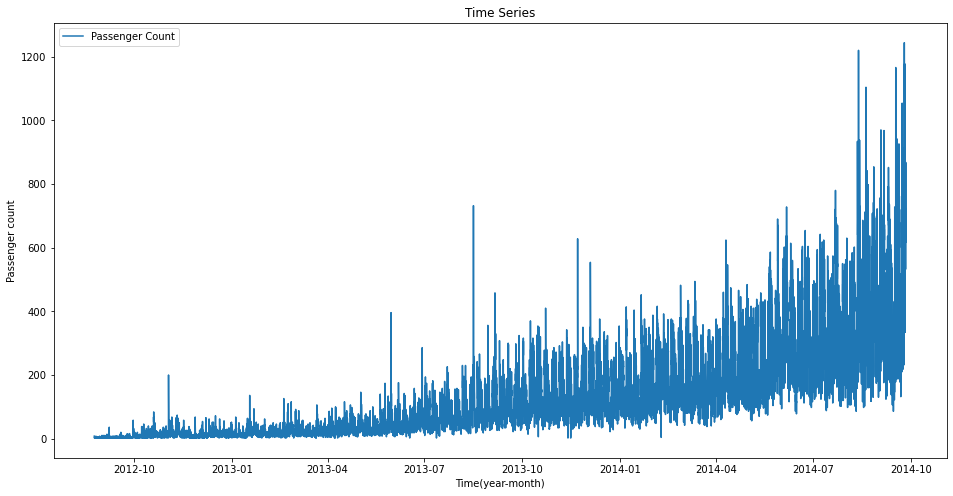

In [15]:
train.index = train['Datetime']
df=train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc='best')

<AxesSubplot:xlabel='year'>

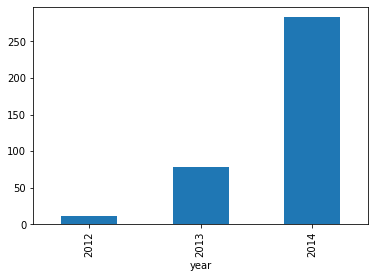

In [16]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

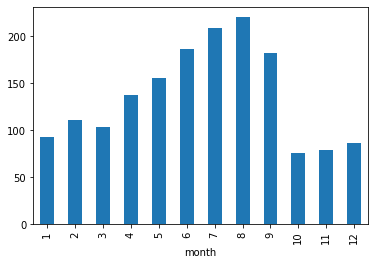

In [17]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

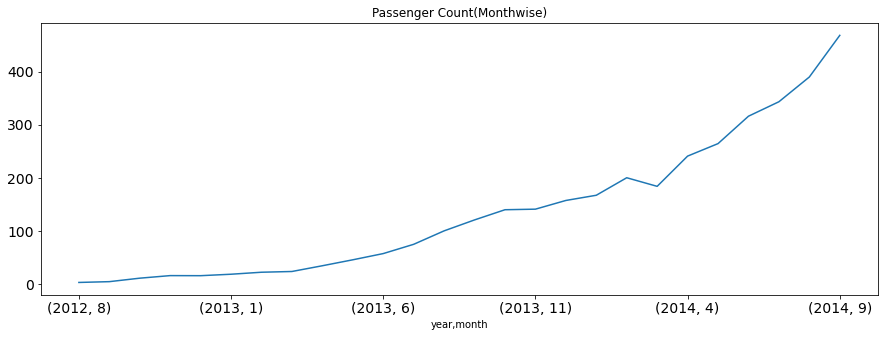

In [18]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passenger Count(Monthwise)',fontsize=14)

<AxesSubplot:xlabel='day'>

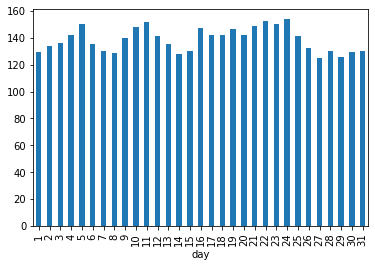

In [19]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

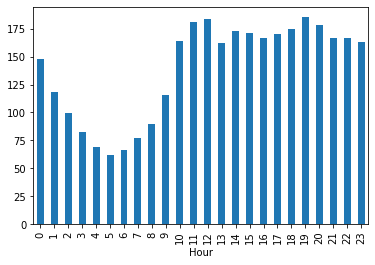

In [20]:
train.groupby('Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

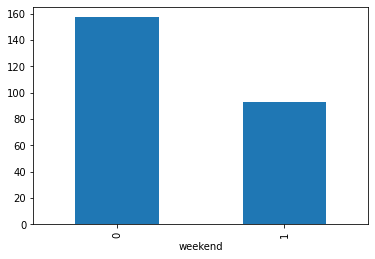

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

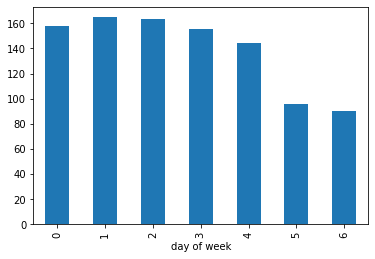

In [22]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [23]:
train = train.drop('ID',1)

In [24]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

In [25]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

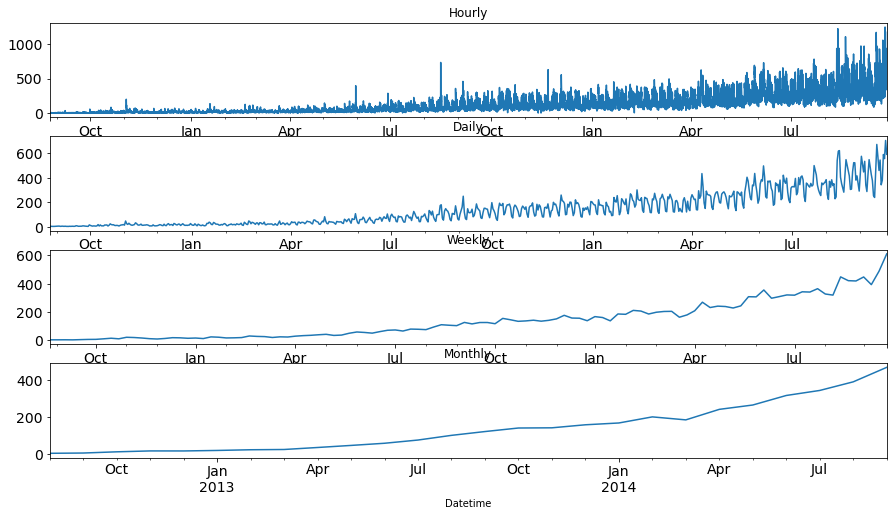

In [26]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax = axs[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax = axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax = axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax = axs[3])

In [27]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test=test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

In [28]:
test.head(5)

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [29]:
train.columns

Index(['Count', 'year', 'month', 'day', 'Hour', 'day of week', 'weekend'], dtype='object')

In [30]:
Train = train['2012-08-25':'2014-06-24'] 
valid = train['2014-06-25':'2014-09-25']

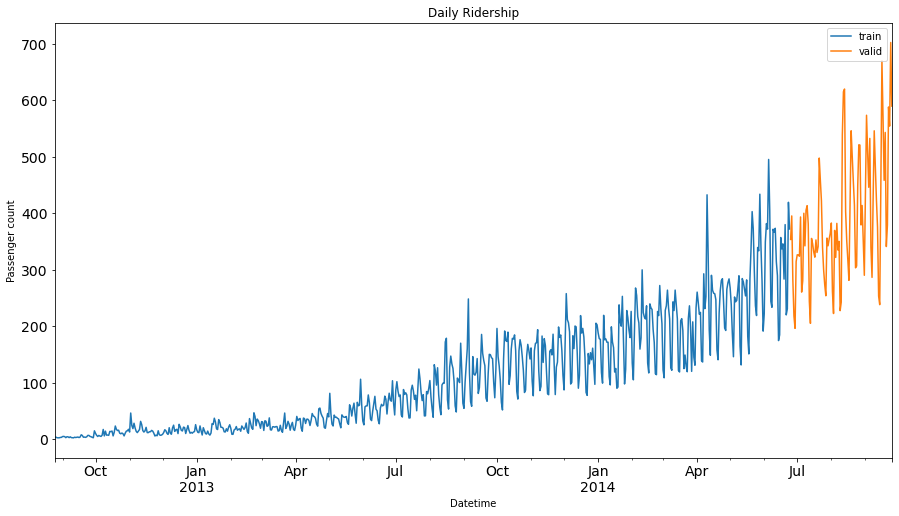

In [31]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership', fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()

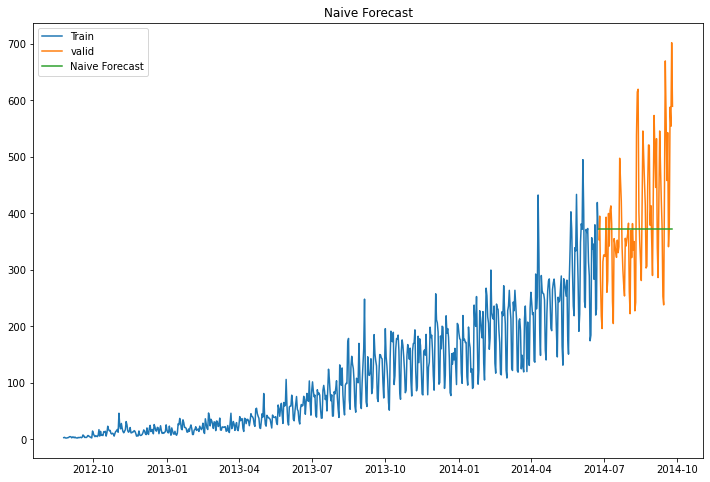

In [32]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

111.79050467496724


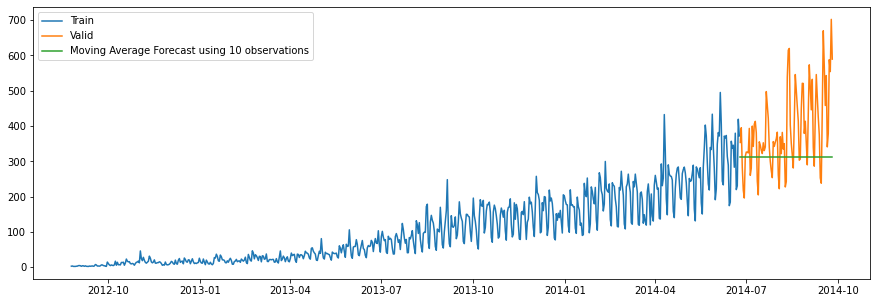

In [34]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

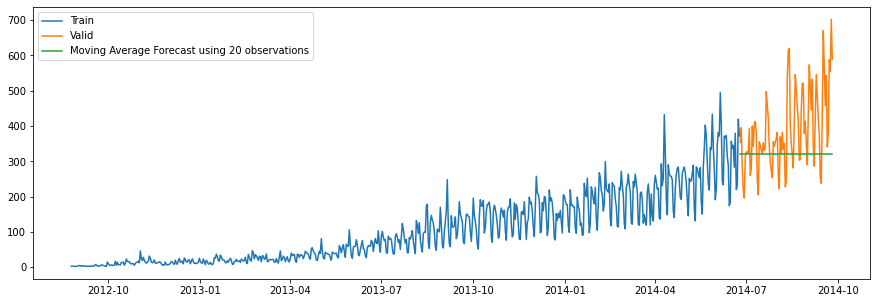

In [35]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

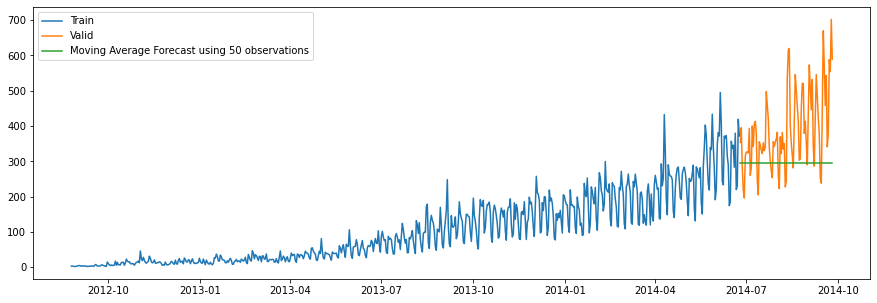

In [36]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [37]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986793


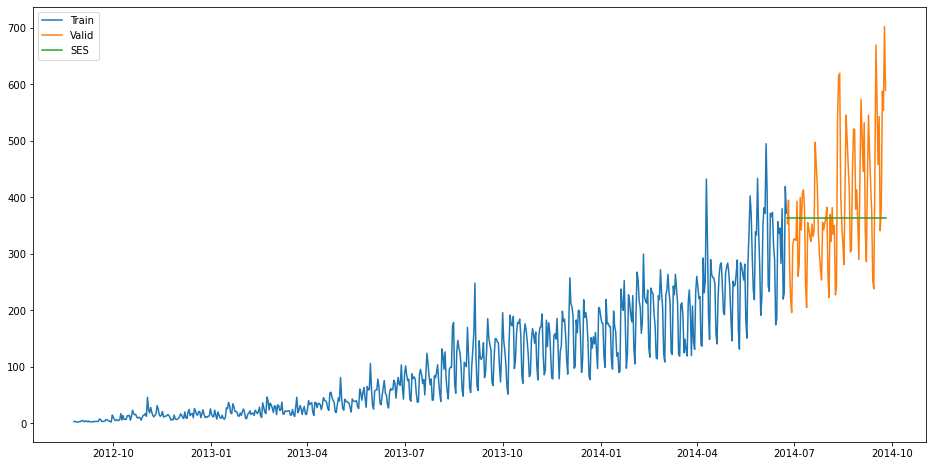

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [39]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


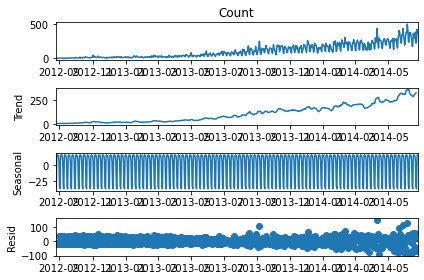

In [40]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
results = sm.tsa.stattools.adfuller(train.Count)
plt.show()

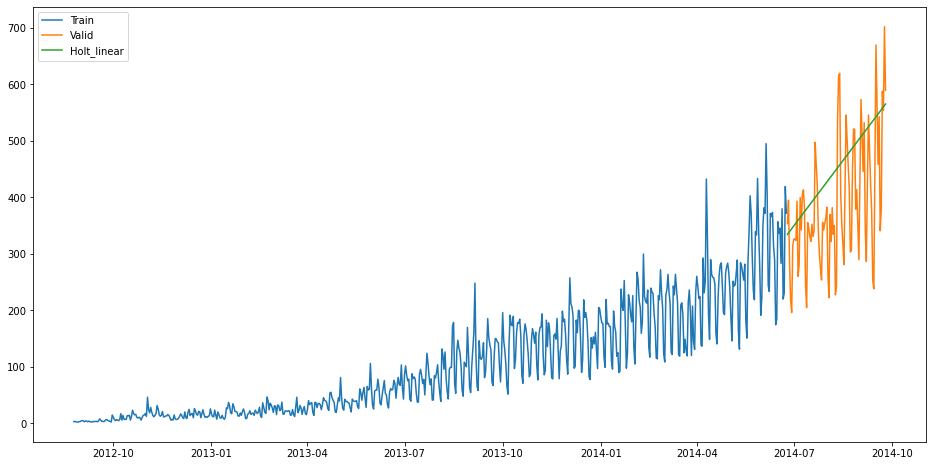

In [41]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [42]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [43]:
submission = pd.read_csv('sample_submission_LSeus50.csv')
predict=fit1.forecast(len(test))
test['prediction'] = predict

In [44]:
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [45]:
temp = train_original.groupby(['Hour'])['ratio'].sum()

In [46]:
temp.head()

Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64

In [47]:
pd.DataFrame(temp,columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [48]:
temp2=pd.read_csv('GROUPby.csv')
temp2.drop('Hour.1',1)

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [49]:
merge=pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','Datetime','Hour_x','Hour_y'],axis=1)
prediction=pd.merge(merge,temp2,on='Hour',how='left')

In [50]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [51]:
submission=prediction.drop(['ID_x','day','ID_y','prediction','Hour','ratio'],axis=1)

In [52]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt linear.csv')

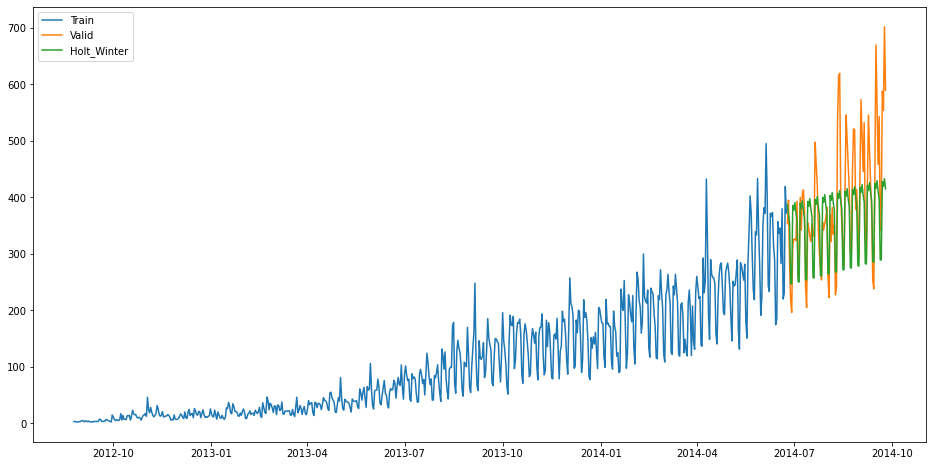

In [53]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_Winter'],label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [54]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_Winter))
print(rms)

82.17103714967703


In [55]:
predict = fit1.forecast(len(test))

In [56]:
test['prediction'] = predict

In [57]:
merge=pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year','month','Datetime','Hour_x','Hour_y'],axis=1)
prediction = pd.merge(merge,temp2,on='Hour',how='left')
prediction=pd.merge(merge,temp2,on='Hour',how='left')
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction','ID_x','ID_y'],axis=1)

In [58]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt winters.csv')

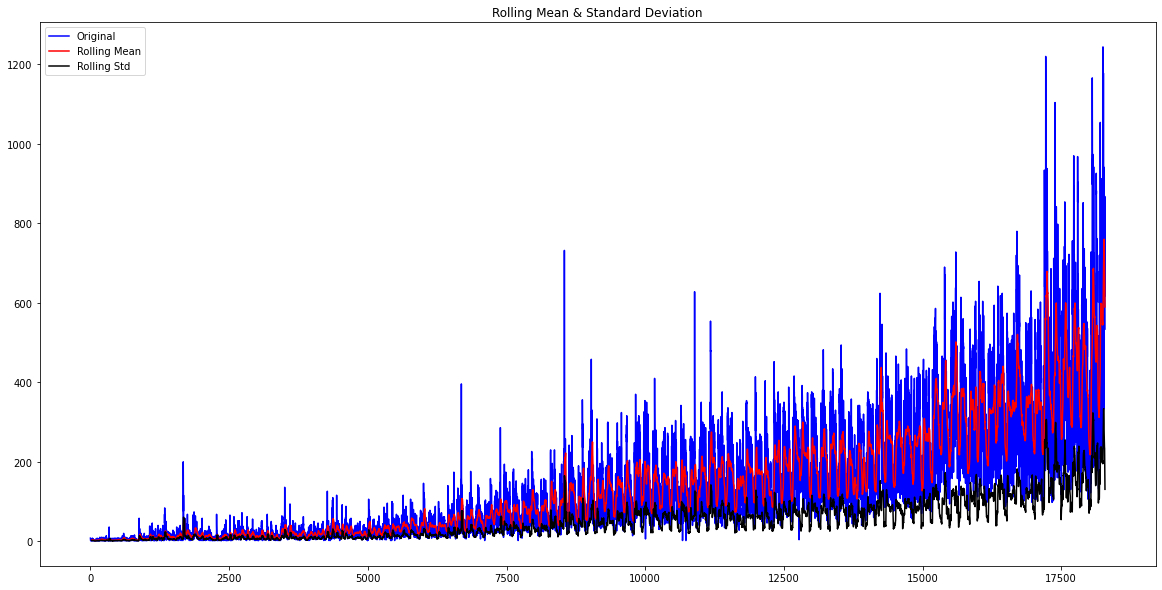

Results of Dickey-Fuller Test:
Test Statistic                   -4.456561
p-value                           0.000235
#Lags Used                       45.000000
Numer of Observations Used    18242.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861698
Critical Value (10%)             -2.566854
dtype: float64


In [59]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Numer of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

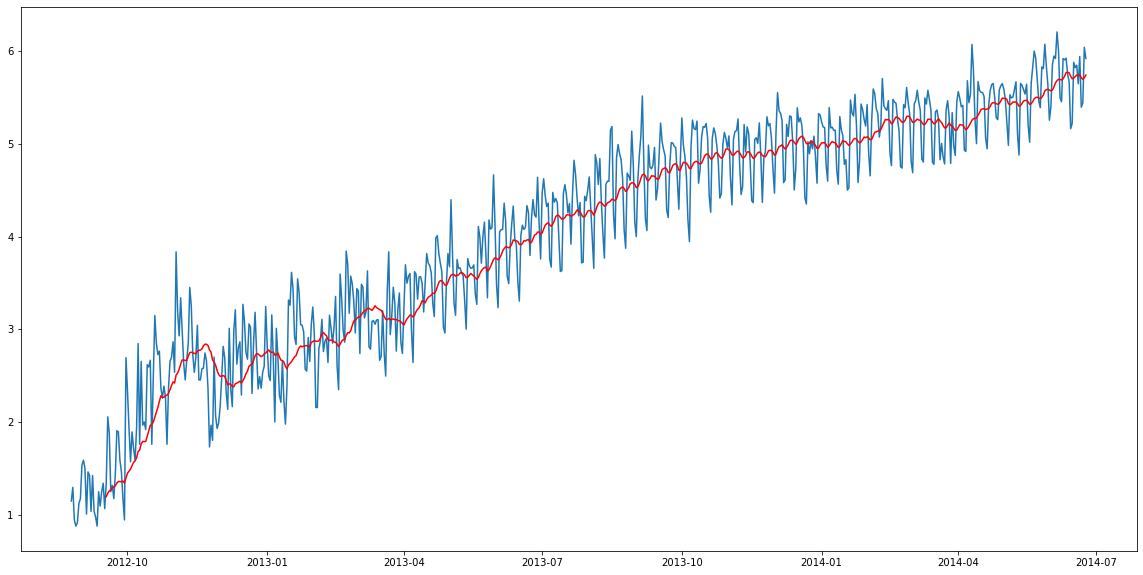

In [60]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

In [61]:
train_log_moving_avg_diff = Train_log - moving_avg

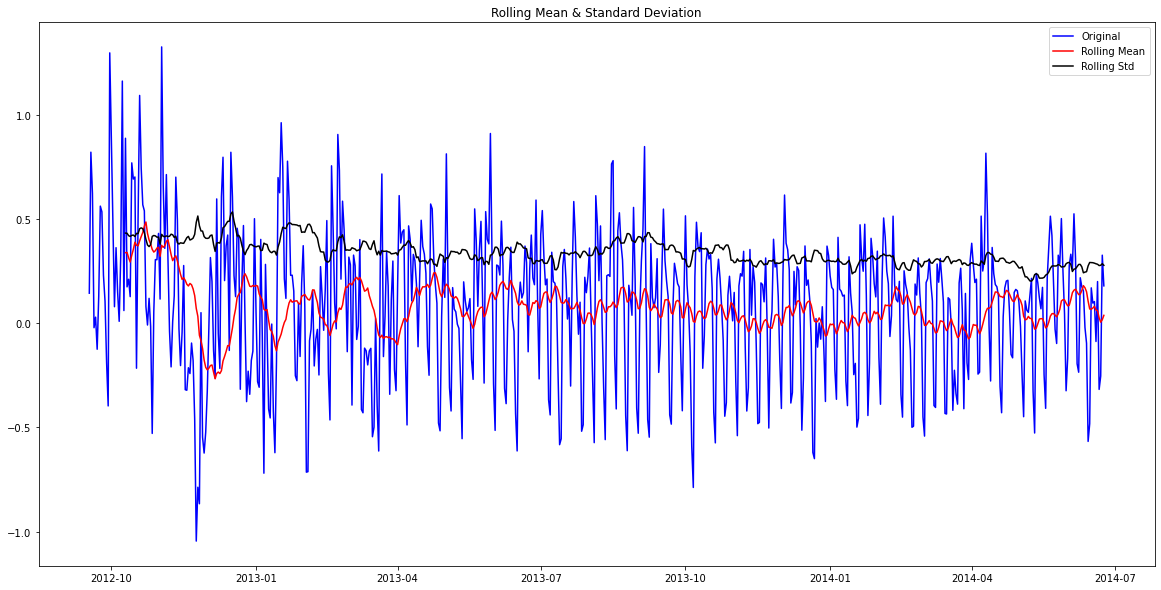

Results of Dickey-Fuller Test:
Test Statistic               -5.861646e+00
p-value                       3.399422e-07
#Lags Used                    2.000000e+01
Numer of Observations Used    6.250000e+02
Critical Value (1%)          -3.440856e+00
Critical Value (5%)          -2.866175e+00
Critical Value (10%)         -2.569239e+00
dtype: float64


In [62]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

In [63]:
train_log_diff = Train_log - Train_log.shift(1)

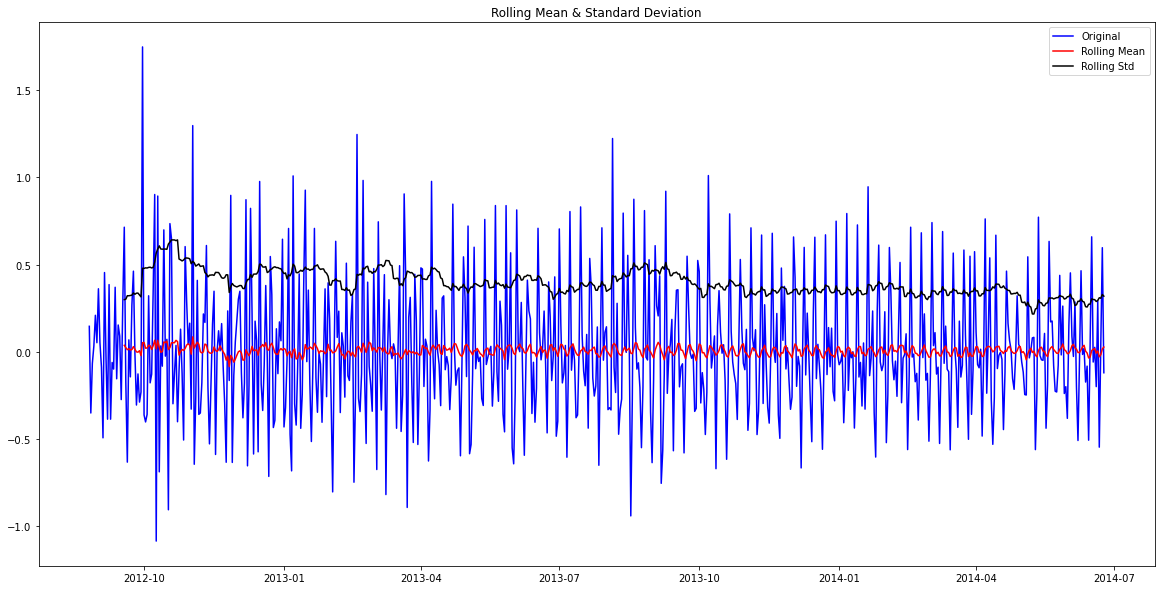

Results of Dickey-Fuller Test:
Test Statistic               -8.237568e+00
p-value                       5.834049e-13
#Lags Used                    1.900000e+01
Numer of Observations Used    6.480000e+02
Critical Value (1%)          -3.440482e+00
Critical Value (5%)          -2.866011e+00
Critical Value (10%)         -2.569151e+00
dtype: float64


In [64]:
test_stationarity(train_log_diff.dropna())

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values,period=24)

In [66]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

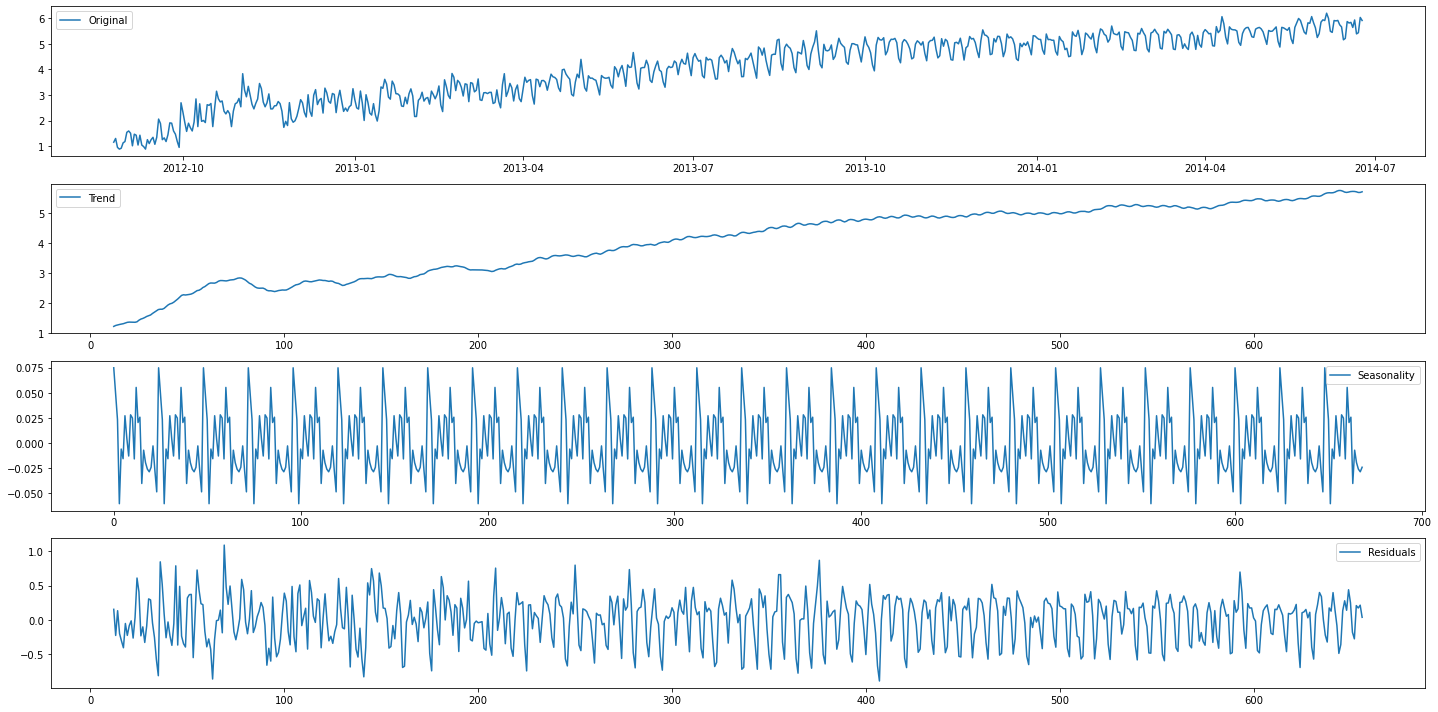

In [67]:
plt.subplot(411)
plt.plot(Train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

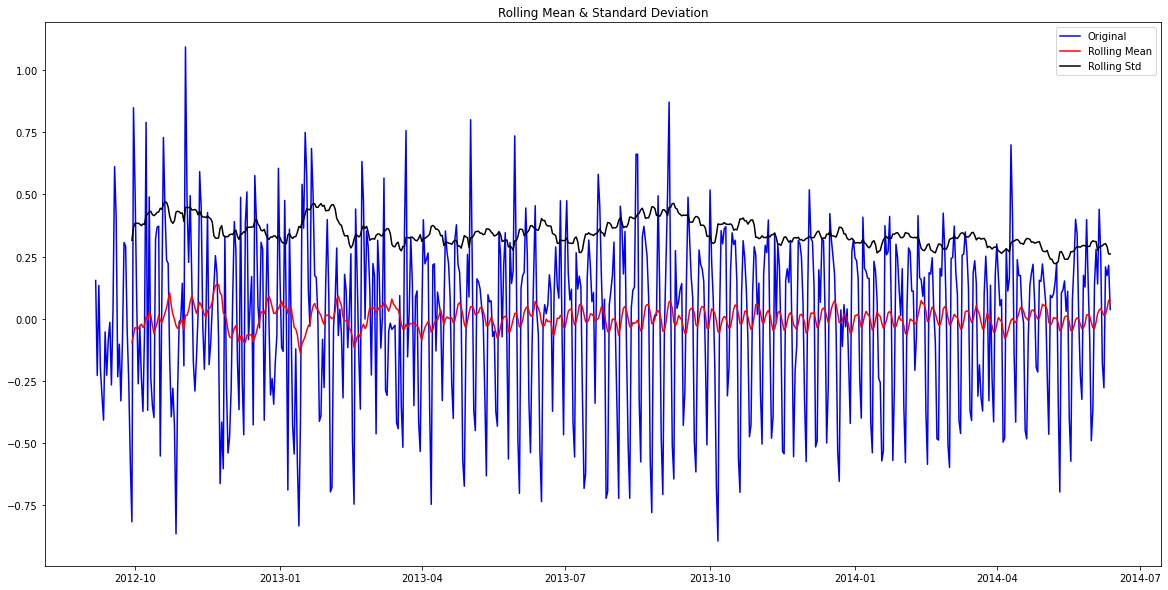

Results of Dickey-Fuller Test:
Test Statistic               -7.822096e+00
p-value                       6.628321e-12
#Lags Used                    2.000000e+01
Numer of Observations Used    6.240000e+02
Critical Value (1%)          -3.440873e+00
Critical Value (5%)          -2.866183e+00
Critical Value (10%)         -2.569243e+00
dtype: float64


In [68]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

In [69]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(),nlags=25)
lag_pacf = pacf(train_log_diff.dropna(),nlags=25,method='ols')

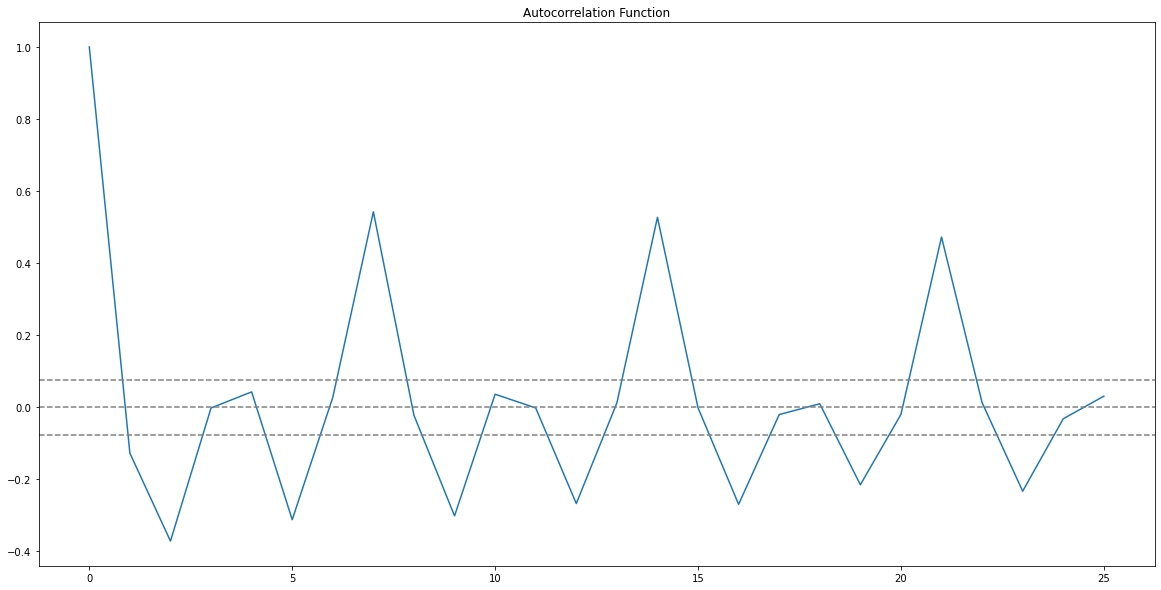

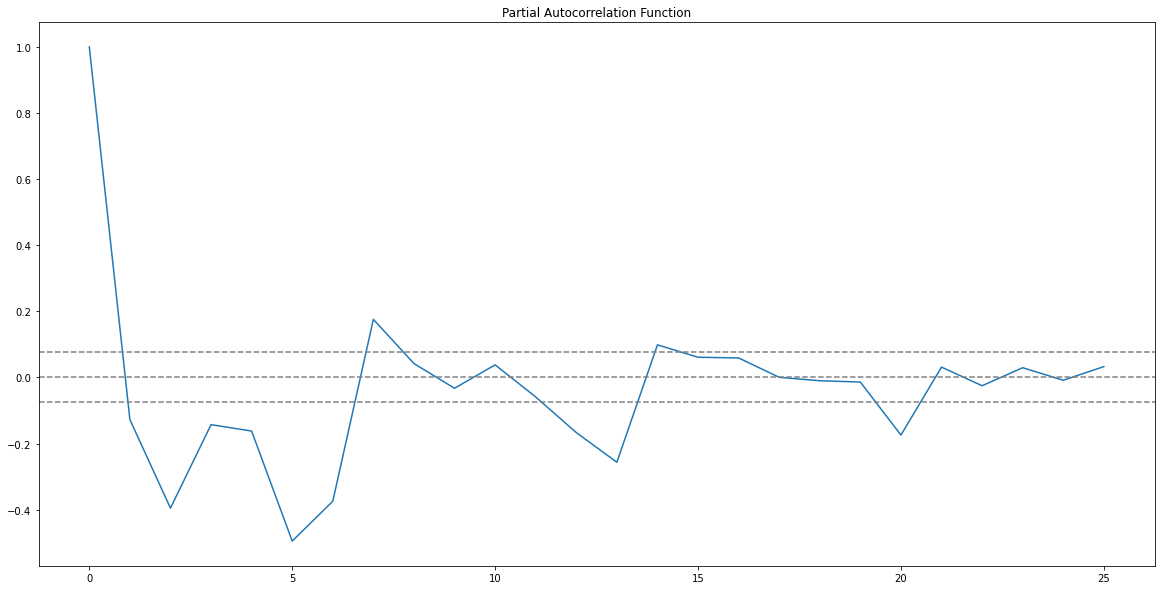

In [70]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")
plt.show()

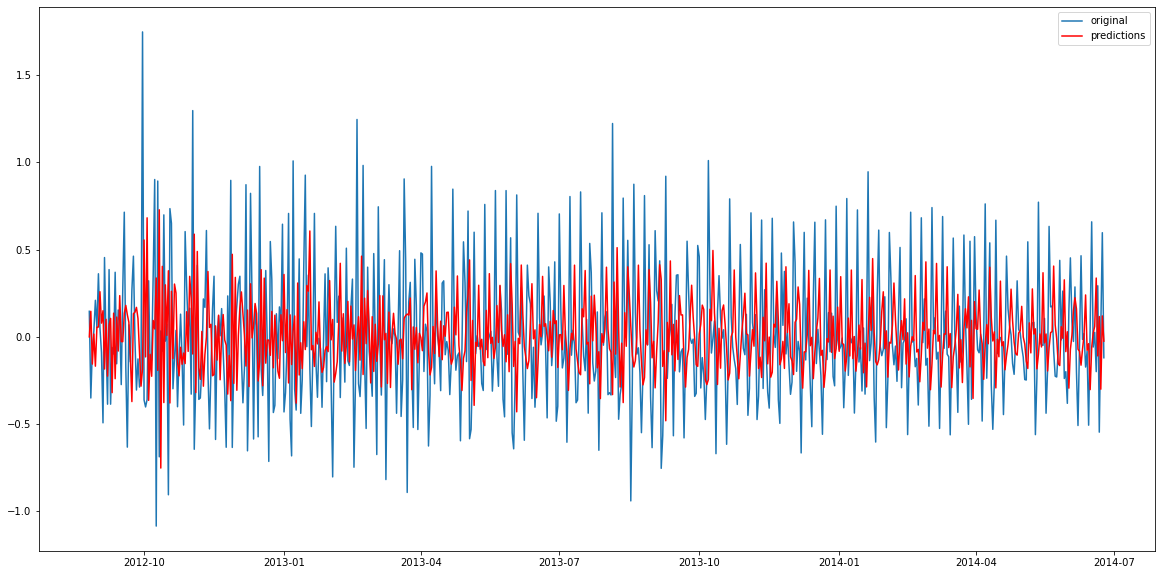

In [80]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_log_diff.dropna(),order=(2,1,0))
results_AR = model.fit()
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_AR.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show()

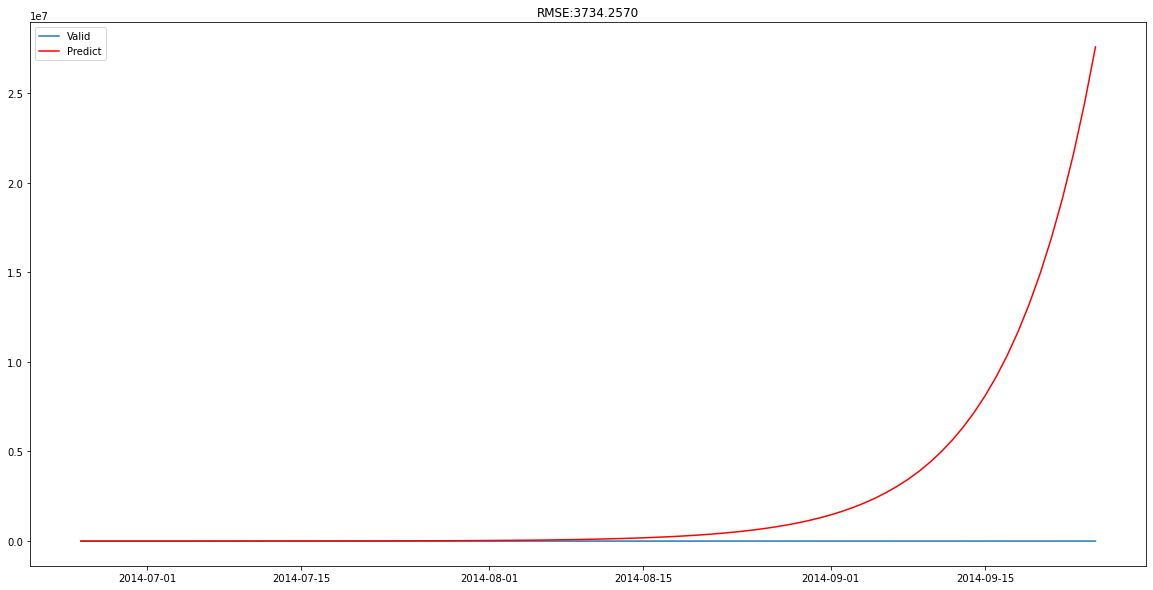

In [81]:
AR_predict = results_AR.predict(start='2014-06-25',end='2014-09-25')
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
AR_predict1 = AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(AR_predict,color='red',label='Predict')
plt.legend(loc='best')
plt.title('RMSE:%.4f'%(np.sqrt(np.dot(AR_predict,valid['Count']))/valid.shape[0]))
plt.show()

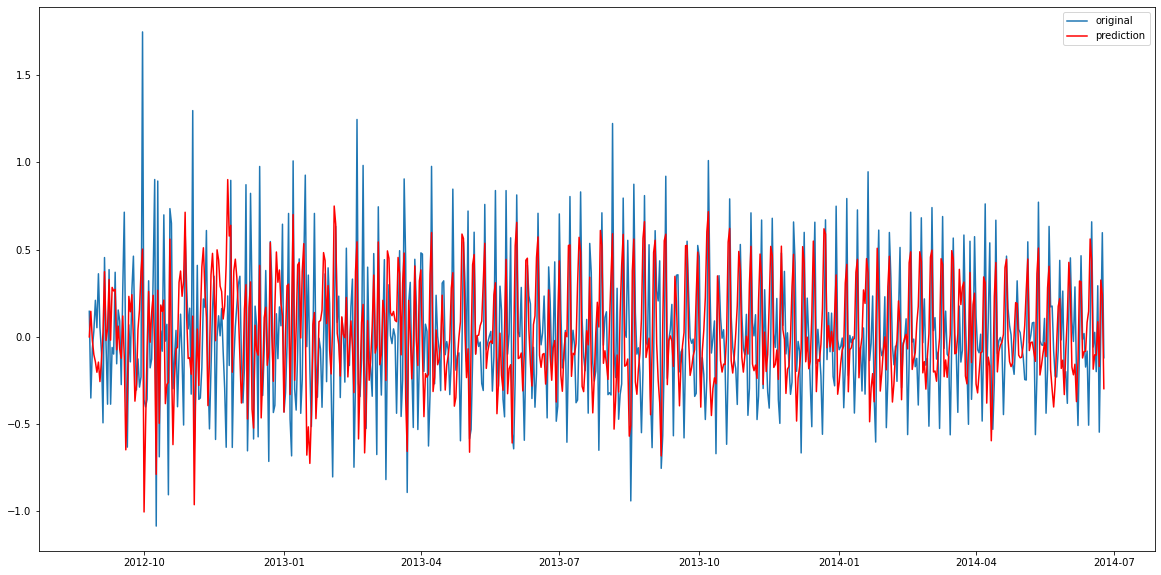

In [73]:
model = ARIMA(train_log_diff.dropna(), order=(0,1,2))
results_MA = model.fit()
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_MA.fittedvalues,color='red',label='prediction')
plt.legend(loc='best')
plt.show()

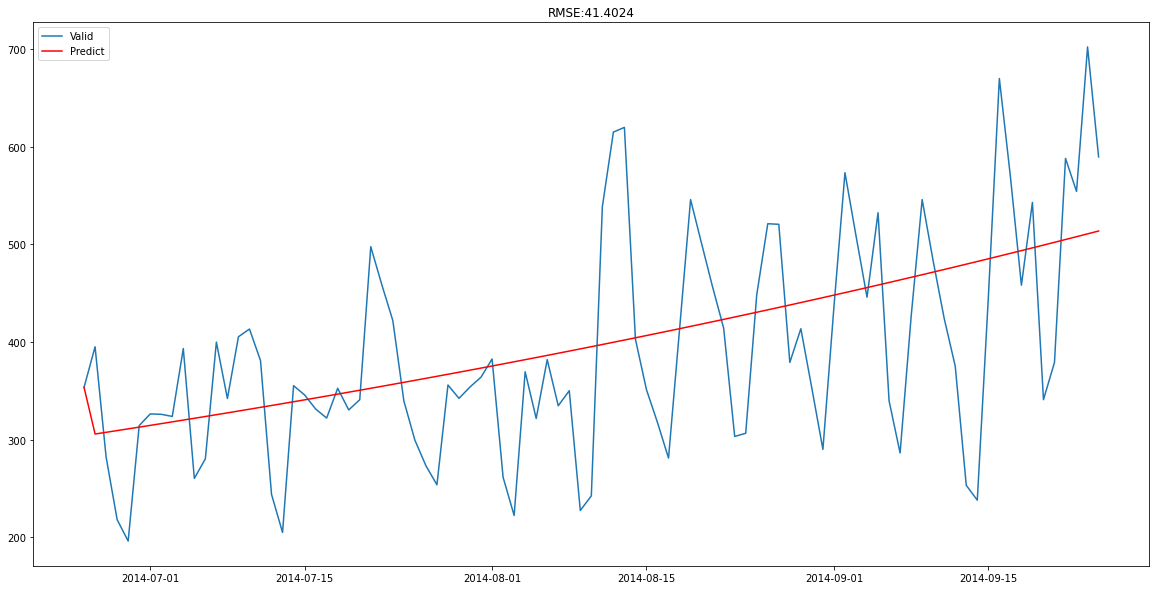

In [74]:
MA_predict = results_MA.predict(start='2014-06-25',end='2014-09-25')
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
MA_predict1 = MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(MA_predict,color='red',label='Predict')
plt.legend(loc='best')
plt.title('RMSE:%.4f'%(np.sqrt(np.dot(MA_predict,valid['Count']))/valid.shape[0]))
plt.show()

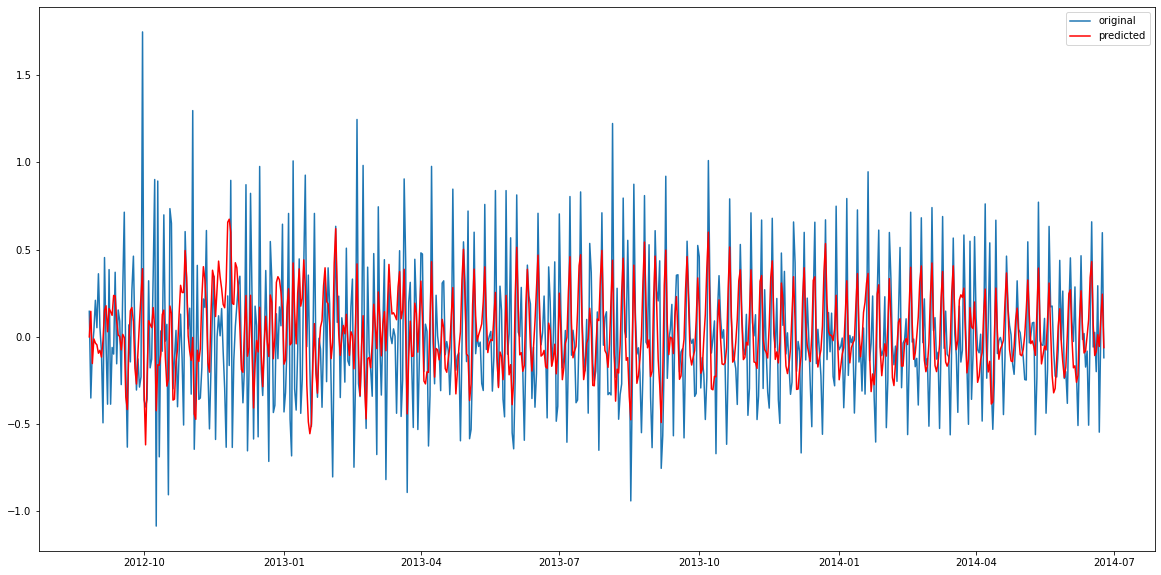

In [86]:
model = ARIMA(train_log_diff.dropna(),order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_ARIMA.fittedvalues,color='red',label='predicted')
plt.legend(loc='best')
plt.show()

In [87]:
def check_prediction_diff(predict_diff,given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0],index=given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    plt.plot(given_set['Count'],label='Given set')
    plt.plot(predict,color='red',label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()
    
def check_prediction_log(predict_log,given_set):
    predict = np.exp(predict_log)
    plt.plot(given_set['Count'],label='Given set')
    plt.plot(predict,color='red',label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()


In [88]:
ARIMA_predict_diff = results_ARIMA.predict(start='2014-06-25',end='2014-09-25')

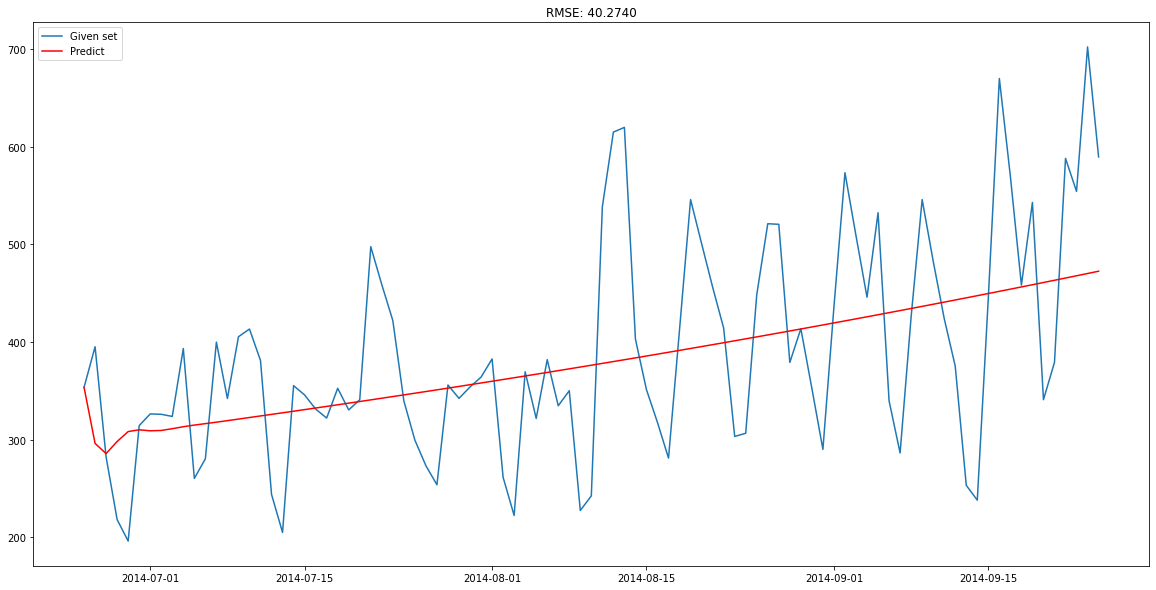

In [89]:
check_prediction_diff(ARIMA_predict_diff,valid)

C:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


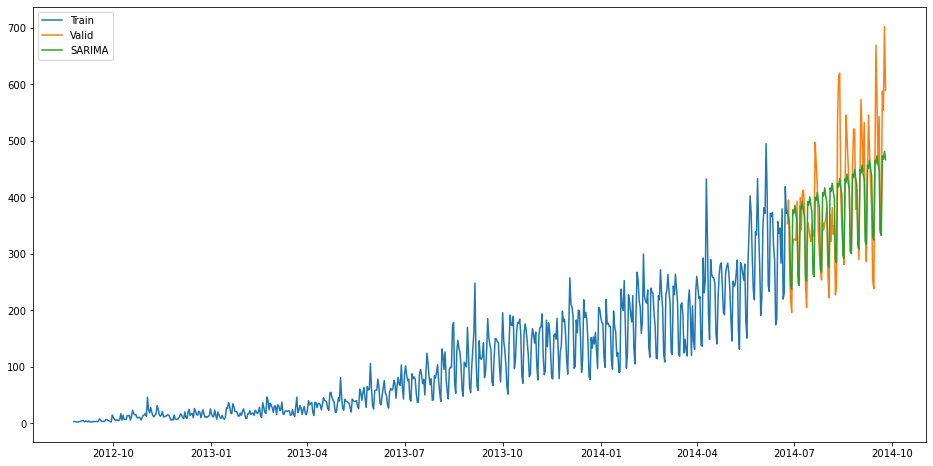

In [91]:
import statsmodels.api as sm
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-6-25',end='2014-9-25',dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SARIMA'],label='SARIMA')
plt.legend(loc='best')
plt.show()

In [92]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SARIMA))
print(rms)

69.72049261607977


In [93]:
predict=fit1.predict(start='2014-09-26',end='2015-4-26',dynamic=True)

C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [95]:
test['prediction'] = predict
merge = pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','Datetime','Hour_x','Hour_y'],axis=1)

prediction = pd.merge(merge,temp2,on='Hour',how='left')
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day','Hour','ratio','prediction','ID_x','ID_y'],axis=1)
pd.DataFrame(submission,columns=['ID','Count']).to_csv('SARIMAX.csv')

In [97]:
tren_x = train_original[['Datetime']]

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


Datetime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
                 ...    
2014-06-20    379.916667
2014-06-21    220.083333
2014-06-22    230.833333
2014-06-23    419.416667
2014-06-24    372.166667
Freq: D, Name: Count, Length: 669, dtype: float64